In [1]:
import torch
import numpy as np
from torch.distributions.uniform import Uniform
import matplotlib.pyplot as plt
%matplotlib inline

from main import train_and_eval, load_data, load_data_classwise

### Visualize training and testing data

### Train the composable flow model

In [2]:
target_distribution = Uniform(0.0, 1.0)
X_train, X_test, y_train, y_test = load_data(get_hvgs = True, scale_and_hvgs = True, calculate_hvg_and_log1p = True)
mapped_loader_train = load_data_classwise(X_train, y_train)
mapped_loader_test = load_data_classwise(X_test, y_test)
mapped_flow_data = {}
for i in ['alpha']:
    if i not in mapped_loader_test:
        continue
    flow, train_losses, test_losses = train_and_eval(150, 1e-2, mapped_loader_train[i], mapped_loader_test[i], target_distribution)
    mapped_flow_data[i] = [flow, train_losses, test_losses]

0        6.759881e-01
1        3.822555e+00
2        2.520753e+00
3        1.000000e-12
4        2.785823e+00
             ...     
20120    3.678275e+00
20121    4.711430e+00
20122    3.557480e+00
20123    3.222704e+00
20124    3.647520e+00
Name: means, Length: 20125, dtype: float64


/Users/anunay.y/personal/SingleCellClassification/SCC/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


['A2M', 'A4GALT', 'AADAC', 'ABCA4', 'ABCB1', 'ABCB11', 'ABCC3', 'ABCC8', 'ABI3', 'ABL2', 'ABTB2', 'ACAN', 'ACE', 'ACE2', 'ACKR3', 'ACOXL', 'ACP5', 'ACR', 'ACRC', 'ACSL1', 'ACSL4', 'ACSL5', 'ACSM2B', 'ACTA1', 'ACTA2', 'ACTB', 'ACTC1', 'ACVRL1', 'ACY1', 'ADAM12', 'ADAM19', 'ADAM7', 'ADAM8', 'ADAMDEC1', 'ADAMTS1', 'ADAMTS12', 'ADAMTS14', 'ADAMTS15', 'ADAMTS2', 'ADAMTS4', 'ADAMTS5', 'ADAMTS7', 'ADAMTS9', 'ADAMTSL2', 'ADARB2', 'ADCY10', 'ADCY2', 'ADCY3', 'ADCY4', 'ADCY5', 'ADCYAP1', 'ADD2', 'ADD3', 'ADGRA2', 'ADGRE2', 'ADGRF1', 'ADGRF2', 'ADGRF5', 'ADGRG5', 'ADGRL2', 'ADGRL4', 'ADH1A', 'ADH1B', 'ADH1C', 'ADH6', 'ADIRF', 'ADM', 'ADM5', 'ADORA2A', 'ADORA3', 'ADRA2B', 'ADRA2C', 'ADRB2', 'AEBP1', 'AFAP1', 'AFAP1L1', 'AGR2', 'AGRN', 'AGT', 'AGXT', 'AHNAK', 'AHR', 'AIF1', 'AIRE', 'AK8', 'AKAP12', 'AKAP5', 'AKAP7', 'AKNA', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'ALAS2', 'ALB', 'ALDH1A1', 'ALDH1A3', 'ALDH3A1', 'ALDH3A2', 'ALDOB', 'ALOX5', 'ALOX5AP', 'ALPL', 'AMBP', 'AMELX', 'AMER3', 'AM

In [3]:
mapped_loader_test

NameError: name 'mapped_loader_test' is not defined

In [4]:
mapped_loader_train

NameError: name 'mapped_loader_train' is not defined

### View the losses

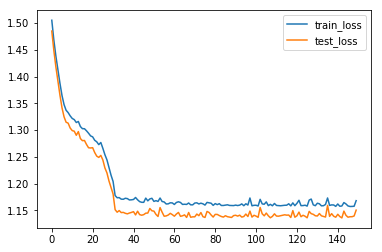

In [4]:
_ = plt.plot(, label='train_loss')
_ = plt.plot(test_losses, label='test_loss')
plt.legend()

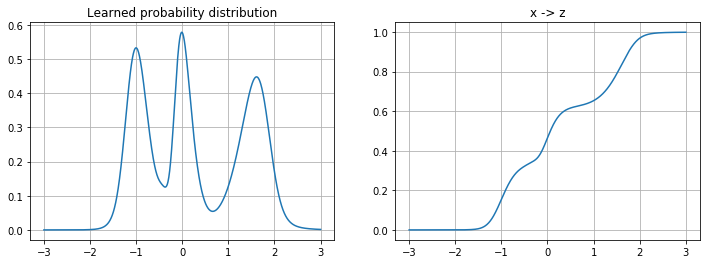

In [5]:
x = np.linspace(-3,3,1000)
with torch.no_grad():
    z, log_dz_by_dx = flow(torch.FloatTensor(x))
    px = (target_distribution.log_prob(z) + log_dz_by_dx).exp()
    
_, axes = plt.subplots(1,2, figsize=(12,4))
_ = axes[0].grid(), axes[1].grid()
_ = axes[0].plot(x,px)
_ = axes[0].set_title('Learned probability distribution')

_ = axes[1].plot(x,z)
_ = axes[1].set_title('x -> z')

### Empirical distribution of z

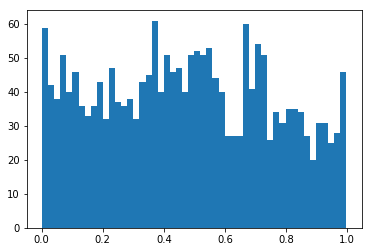

In [6]:
with torch.no_grad():
    z, log_dz_by_dx = flow(torch.FloatTensor(train_loader.dataset.array))
    px = (target_distribution.log_prob(z) + log_dz_by_dx).exp().cpu().numpy()
    
_ = plt.hist(z, bins=50)